In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import itertools

sns.set_style("whitegrid")

In [2]:
# Import data
df = pd.read_csv('Music Sales.csv')

In [3]:
# Convert 'InvoiceDate' to datetime
# Create month variable based on 'InvoiceDate'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_Month'] = df['InvoiceDate'].astype('datetime64[M]')

In [4]:
df.dtypes

Album                        object
Artist                       object
Bytes                        object
Sales                       float64
City                         object
Company                      object
Composer                     object
Country                      object
CustomerID                    int64
Email                        object
FirstName                    object
Genre                        object
InvoiceDate          datetime64[ns]
InvoiceID                     int64
LastName                     object
MediaType                    object
Milliseconds                  int64
Number of Records             int64
Phone                        object
PostalCode                   object
Quantity                      int64
Region                       object
State                        object
Track                        object
UnitPrice                   float64
InvoiceDate_Month    datetime64[ns]
dtype: object

In [5]:
df.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice,InvoiceDate_Month
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99,2008-01-01
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99,2008-01-01
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99,2008-01-01
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99,2008-01-01
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99,2008-01-01


## Q1: Make a time series plot for sales in US and Canada

In [6]:
# Filter out US and Canada data
df_USA_CAN = df[df['Country'].isin(['USA', 'Canada'])].copy()
df_USA_CAN[['Country', 'InvoiceDate', 'Sales', ]].head()

,Country,InvoiceDate,Sales
12,Canada,2008-01-06,0.99
13,Canada,2008-01-06,1.98
14,Canada,2008-01-06,2.97
15,Canada,2008-01-06,2.97
16,Canada,2008-01-06,2.97


In [7]:
# Calculate daily sales in US and Canada
# The daily sales data is not available everyday so it is quite sparse. Get the monthly sales instead.
daily_sales = df_USA_CAN.groupby(['Country', 'InvoiceDate']).Sales.sum().reset_index()
daily_sales.head()

,Country,InvoiceDate,Sales
0,Canada,2008-01-06,31.68
1,Canada,2008-03-09,27.72
2,Canada,2008-04-22,0.99
3,Canada,2008-06-05,2.97
4,Canada,2008-07-16,41.58


In [8]:
# Calculate monthly sales in US and Canada
# The monthly sales data is less sparse. But the sales data is not available for every month. For example, Feb in 2008.
monthly_sales = df_USA_CAN.groupby(['Country', 'InvoiceDate_Month']).Sales.sum().reset_index()
monthly_sales.head()

,Country,InvoiceDate_Month,Sales
0,Canada,2008-01-01,31.68
1,Canada,2008-03-01,27.72
2,Canada,2008-04-01,0.99
3,Canada,2008-06-01,2.97
4,Canada,2008-07-01,43.56


In [9]:
# Assuming there is no data loss during data collection, missing months here mean no sale for the particular months.
# Create a template with all months presented
t = pd.DataFrame(list(itertools.product(['Canada', 'USA'],
                                        pd.date_range('2008-01-01', '2012-12-31', freq='MS'))),
                 columns=['Country', 'InvoiceDate_Month'])

In [10]:
# Impute the sales from missing months as 0
monthly_sales_new = pd.merge(t, monthly_sales, 
                             on=['Country', 'InvoiceDate_Month'], 
                             how='left')
monthly_sales_new.fillna(0, inplace=True)
monthly_sales_new.head()

,Country,InvoiceDate_Month,Sales
0,Canada,2008-01-01,31.68
1,Canada,2008-02-01,0.00
2,Canada,2008-03-01,27.72
3,Canada,2008-04-01,0.99
4,Canada,2008-05-01,0.00


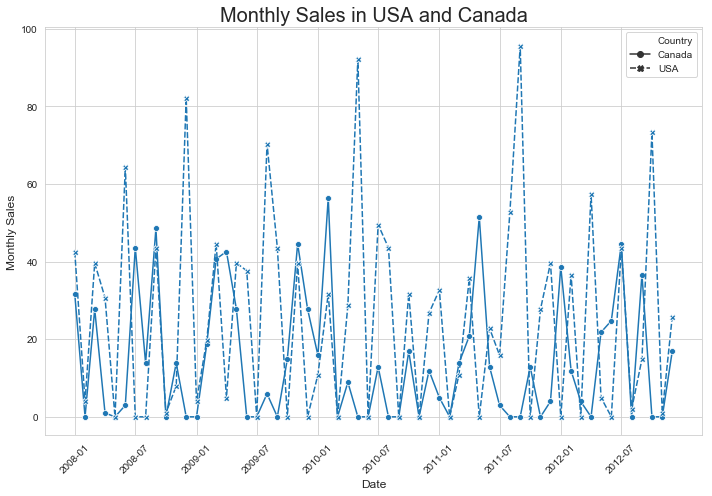

In [11]:
# Plot monthly sales in US and Canada
plt.rcParams['figure.figsize'] = (10, 7)
ax = sns.lineplot(x='InvoiceDate_Month', y='Sales', data=monthly_sales_new,
                  style='Country', markers=True)
ax.set_title('Monthly Sales in USA and Canada', size=20)
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Monthly Sales', size=12)

# Format the x-axis labels
ax.set_xticks(monthly_sales_new['InvoiceDate_Month'].values[np.arange(0, 60, 6)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()

## Q2: Explore how Rock music monthly market share fluctuate in US in 2011 and 2012

In [12]:
# Filter out US in 2011 and 2012
df_US_2011and2012 = df[(df['Country'] == 'USA') &
                       (df['InvoiceDate'] >= '2011-01-01') &
                       (df['InvoiceDate'] <= '2012-12-31')].copy()

In [13]:
# Calculate total monthly sales of all genre
US_total_sales = df_US_2011and2012.groupby(['InvoiceDate_Month']).Sales.sum().reset_index()
US_total_sales.rename(columns={'Sales': 'Total_Sales'}, inplace=True)

In [14]:
# Calculate total monthly sales of Rock
US_rock_sales = df_US_2011and2012[df_US_2011and2012['Genre'] == 'Rock'].groupby(['InvoiceDate_Month']).Sales.sum().reset_index()
US_rock_sales.rename(columns={'Sales': 'Rock_Sales'}, inplace=True)

In [15]:
# Calculate Rock market share
# Note: In this table, there are months with total sales but not Rock sales.
#       This means there is no rock sales for this particular month, which means 0% market share.
US_rock_mkt_share = pd.merge(US_total_sales, US_rock_sales, 
                             on='InvoiceDate_Month', 
                             how='left')
US_rock_mkt_share.fillna(0, inplace=True)
US_rock_mkt_share['Rock_Market_Share'] = US_rock_mkt_share['Rock_Sales'] * 100 / US_rock_mkt_share['Total_Sales']
US_rock_mkt_share.head()

,InvoiceDate_Month,Total_Sales,Rock_Sales,Rock_Market_Share
0,2011-01-01,32.67,10.89,33.333333
1,2011-03-01,10.89,0.00,0.000000
2,2011-04-01,35.64,14.85,41.666667
3,2011-06-01,22.77,18.81,82.608696
4,2011-07-01,15.87,0.00,0.000000


In [16]:
# Note: In the table above, there are some months completely missing. For example, Feb 2011.
#       This means there is no sale at all for the month, which also means there is no data avaible to estimate market share.
#       So we will add these months to the table and keep them as NA
t2 = pd.DataFrame(pd.date_range('2011-01-01', '2012-12-31', freq='MS'),
                  columns=['InvoiceDate_Month'])
US_rock_mkt_share_new = pd.merge(t2, US_rock_mkt_share,
                                 on='InvoiceDate_Month',
                                 how='left')
US_rock_mkt_share_new.head()

,InvoiceDate_Month,Total_Sales,Rock_Sales,Rock_Market_Share
0,2011-01-01,32.67,10.89,33.333333
1,2011-02-01,NaN,NaN,NaN
2,2011-03-01,10.89,0.00,0.000000
3,2011-04-01,35.64,14.85,41.666667
4,2011-05-01,NaN,NaN,NaN


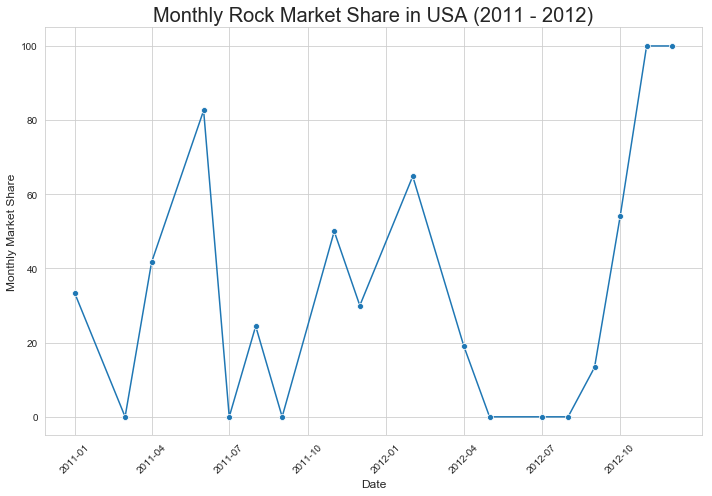

In [17]:
# If we use lineplot as is, when the viewer reads this plot,
# s/he will assume that for months like Feb 2011 have an estimated positive market share.
# In reality, the data is not avaible for the market share estimation.
# Option 1: We could label all the months with zero sales one by one to avoid such confusion.

plt.rcParams['figure.figsize'] = (10, 7)
ax = sns.lineplot(x='InvoiceDate_Month', y='Rock_Market_Share',
                  data=US_rock_mkt_share_new, marker='o')
ax.set_title('Monthly Rock Market Share in USA (2011 - 2012)', size=20)
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Monthly Market Share', size=12)

# Format the x-axis labels
ax.set_xticks(US_rock_mkt_share_new['InvoiceDate_Month'].values[np.arange(0, 24, 3)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()

In [18]:
# Option 2: We will use pointplot by not plotting the months without sales.
# Seaborn pointplot is a categorical plot. So I need to modify the format of the date to get it displayed as year and month.
US_rock_mkt_share_new['InvoiceDate_Month_new'] = US_rock_mkt_share_new['InvoiceDate_Month'].dt.strftime("%Y-%m")

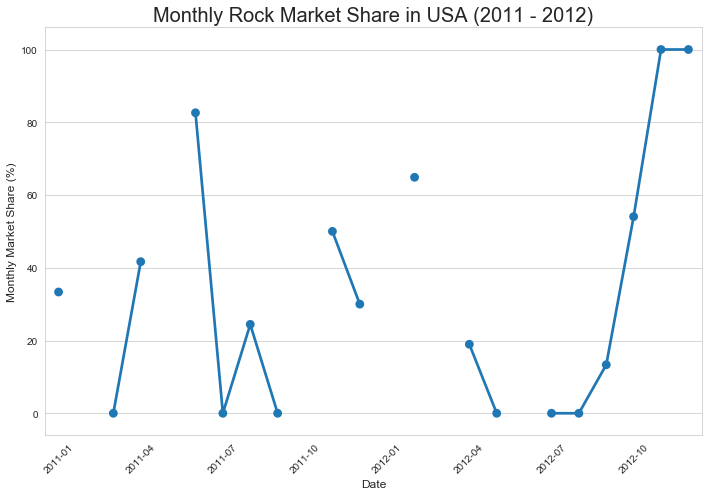

In [19]:
plt.rcParams['figure.figsize'] = (10, 7)
ax = sns.pointplot(x='InvoiceDate_Month_new', y='Rock_Market_Share', data=US_rock_mkt_share_new)
ax.set_title('Monthly Rock Market Share in USA (2011 - 2012)', size=20)
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Monthly Market Share (%)', size=12)

# reduce the number of x-axis labels
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 3 == 0:  # keep the beginning month of every quarter
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=45)

plt.tight_layout()